In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


In [2]:
df=pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [34]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,3.650000e+02,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,4.045012e+06,4623.810959,2.742466,1.0,1.553425,0.838356,0.139726,0.317808,0.038356,0.235616,0.536986,0.208219
std,1.247181e+06,1723.729307,0.624130,0.0,0.616192,0.368629,0.347178,0.466264,0.192318,0.424966,0.760911,0.406592
min,1.750000e+06,1650.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+06,3460.000000,2.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.850000e+06,4079.000000,3.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.690000e+06,5800.000000,3.000000,1.0,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,9.100000e+06,10360.000000,4.000000,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df = remove_outliers_iqr(df, numeric_cols)

In [27]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [28]:

X = df.drop("price", axis=1)
y = df["price"].values.reshape(-1, 1)

feature_scaler = StandardScaler()
target_scaler = StandardScaler()


numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = feature_scaler.fit_transform(X[numeric_cols])

y_scaled = target_scaler.fit_transform(y).ravel()


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred_scaled = lr.predict(X_test)

In [32]:
y_pred_original = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [33]:
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Evaluation Metrics:
MAE: 704466.39
MSE: 1074203165776.44
R² Score: 0.4965


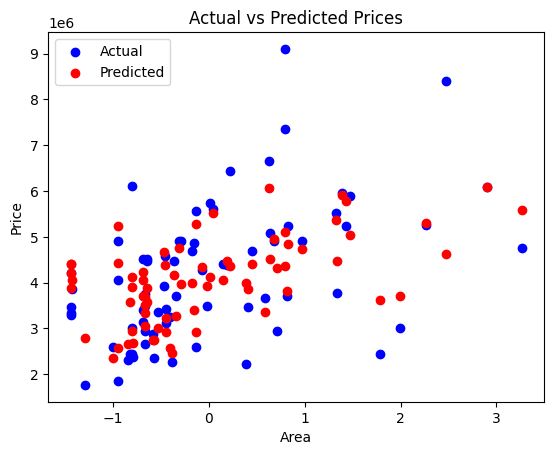


🔍 Top Influential Features:
                            Feature  Coefficient
12     furnishingstatus_unfurnished    -0.420677
0                              area     0.297416
6                          basement     0.181675
10                         prefarea     0.175468
8                   airconditioning     0.162592
3                           stories     0.150201
9                           parking     0.118614
7                   hotwaterheating     0.105390
5                         guestroom     0.093407
11  furnishingstatus_semi-furnished    -0.076440


In [35]:

plt.scatter(X_test['area'], y_test_original, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred_original, color='red', label='Predicted')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\n🔍 Top Influential Features:")
print(coefficients.head(10))

